In [2]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, concatenate, Dense, Flatten
from tensorflow.keras.layers import Conv1D, AveragePooling1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import load_model

import tensorflow as tf
import pickle
import numpy as np

# DQN_CNN

In [24]:
layers = 1
filters1 = 32
filters2 = 32
opt = 'SGD'


# Input Layers
price_input = Input(shape=(5,1,), name='price_input')
env_input = Input(shape=(2,), name='env_input')

# Adjsustable Hidden Layers
price_layer = Conv1D(filters=filters1, kernel_size=2, 
                     activation='relu', name='price_layer1')(price_input)
for _ in range(layers-1):
    price_layer = Conv1D(filters=filters2, kernel_size=2, 
                         activation='relu', name='price_layer2')(price_layer)

# Average Pooling Layers
price_layer = AveragePooling1D(pool_size=2)(price_layer)

# Dropout
#if dropout:
#	price_final = Dropout(0.1, name='dropout')(price_final)

price_final = Flatten(name='price_flatten')(price_layer)

# Fixed layers
concat_layer = concatenate([price_final, env_input], name='concat_layer')
fixed_layer1 = Dense(8, activation='relu', name='fixed_layer1')(concat_layer)
fixed_layer2 = Dense(4, activation='relu', name='fixed_layer2')(fixed_layer1)

# Output Layer
action_output = Dense(1, activation='linear', name='action_output')(fixed_layer2)

model = Model(inputs=[price_input, env_input], outputs=[action_output])
model.compile(optimizer=opt, loss={'action_output':'mse'})

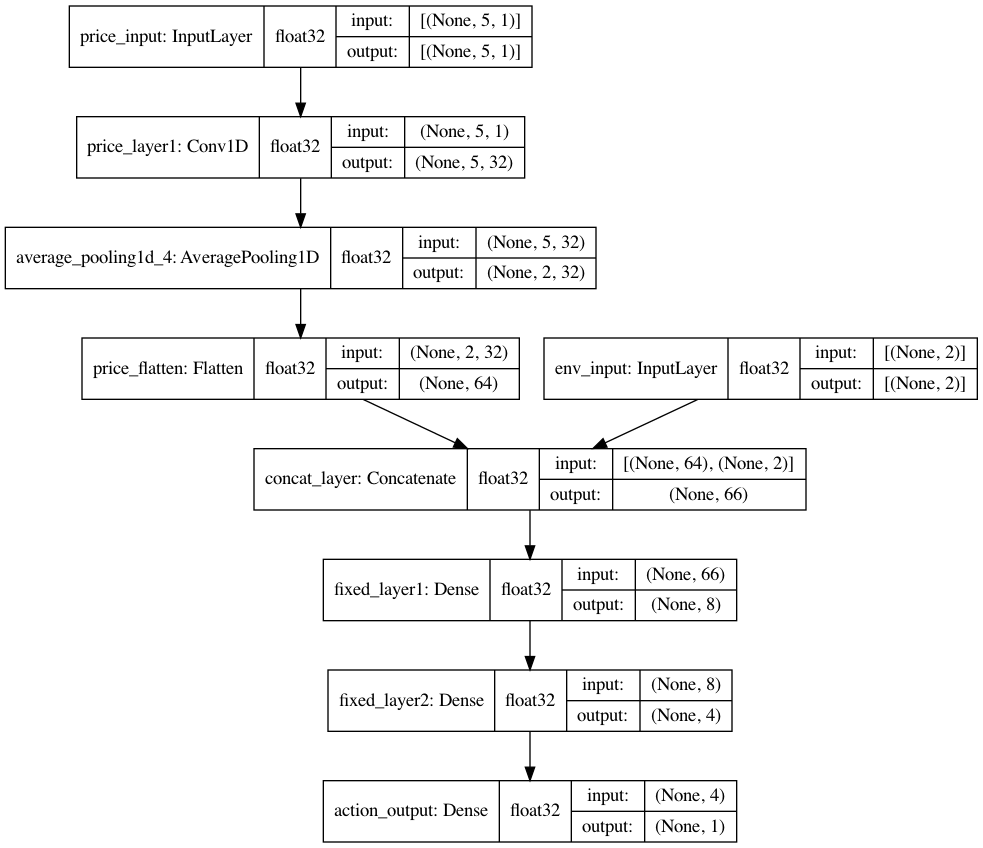

In [16]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True,)

# DQN_RNN

In [6]:
layers = 2
filters1 = 8
filters2 = 8
opt = 'SGD'

price_input = Input(shape=(5,1,), name='price_input')
env_input = Input(shape=(2,), name='env_input')

# Adjsustable Hidden Layers
price_layer = LSTM(filters1, return_sequences=True, activation='relu', name='price_layer1')(price_input)
for _ in range(layers-1):
    price_layer = LSTM(filters2, activation='relu', name='price_layer2')(price_layer)
price_final = Flatten(name='price_flatten')(price_layer)

# Dropout
#if dropout:
#	price_final = Dropout(name='dropout')(price_final)

# Fixed layers
concat_layer = concatenate([price_final, env_input], name='concat_layer')
fixed_layer1 = Dense(8, activation='relu', name='fixed_layer1')(concat_layer)
fixed_layer2 = Dense(4, activation='relu', name='fixed_layer2')(fixed_layer1)

# Output Layer
action_output = Dense(1, activation='linear', name='action_output')(fixed_layer2)

model = Model(inputs=[price_input, env_input], outputs=[action_output])
model.compile(optimizer=opt, loss={'action_output':'mse'})

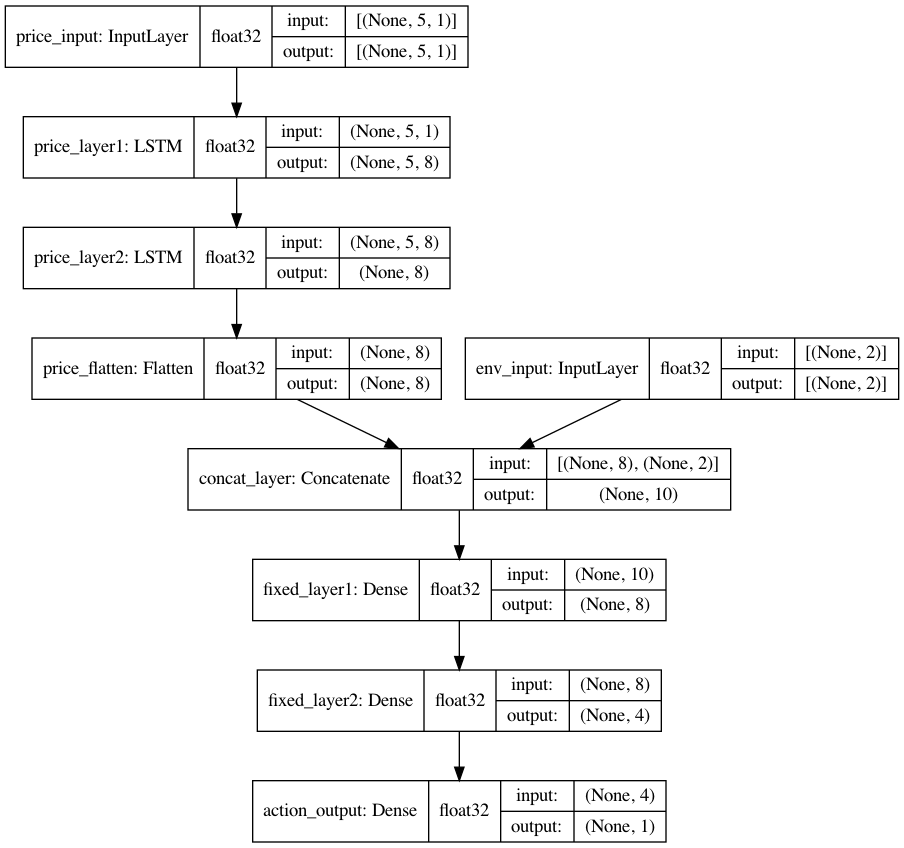

In [7]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True,)

# DQN_ANN

In [5]:
layers = 2
node1 = 8
node2 = 8
opt = 'SGD'

price_input = Input(shape=(120,1,), name='price_input')
env_input = Input(shape=(2,), name='env_input')

# Adjsustable Hidden Layers
price_layer = Dense(node1, activation='relu', name='price_layer1')(price_input)
for _ in range(layers-1):
    price_layer = LSTM(node2, activation='relu', name='price_layer2')(price_layer)
price_final = Flatten(name='price_flatten')(price_layer)

# Fixed layers
concat_layer = concatenate([price_final, env_input], name='concat_layer')
fixed_layer1 = Dense(8, activation='relu', name='fixed_layer1')(concat_layer)
fixed_layer2 = Dense(4, activation='relu', name='fixed_layer2')(fixed_layer1)

# Output Layer
action_output = Dense(1, activation='linear', name='action_output')(fixed_layer2)

model = Model(inputs=[price_input, env_input], outputs=[action_output])
model.compile(optimizer=opt, loss={'action_output':'mse'})

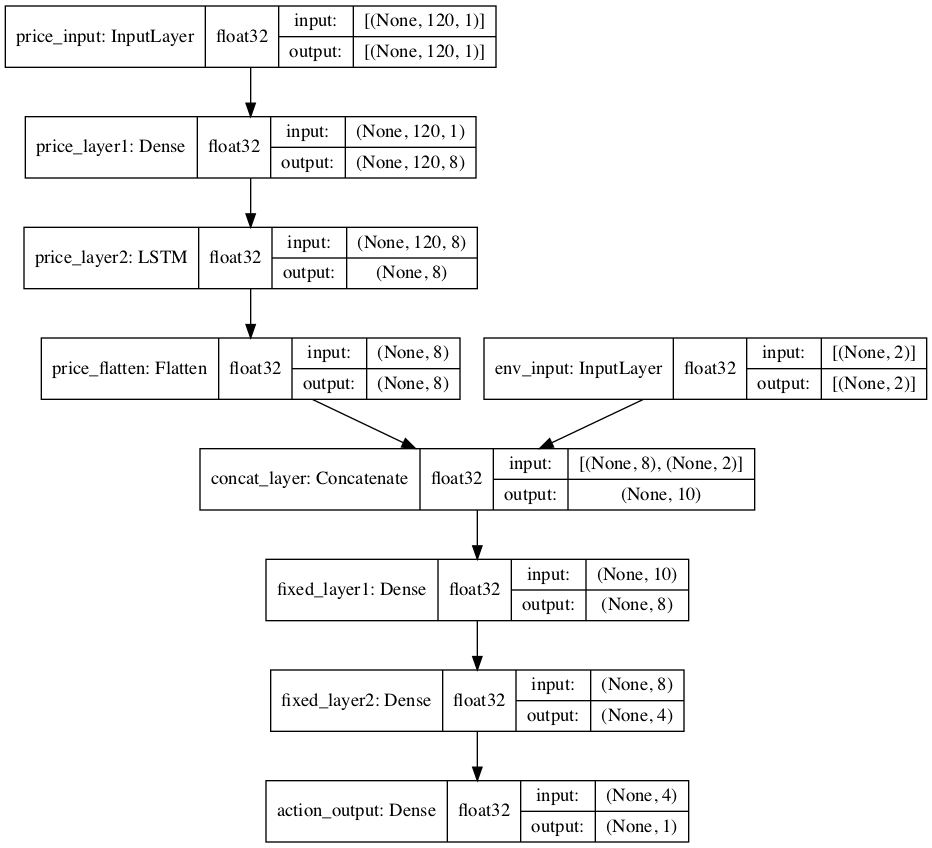

In [7]:
tf.keras.utils.plot_model(model, to_file='3_base_model.png', show_shapes=True, show_dtype=True, show_layer_names=True,)